## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [276]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import urllib.request

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

import logging
import warnings

warnings.filterwarnings('ignore')
logging.getLogger('matplotlib').setLevel(logging.ERROR)

Прочитаем наш файл с исходными данными:

In [277]:
# Создание каталога для хранения необработанных данных
if not os.path.exists('data/raw'):
  os.makedirs('data/raw')

# Загрузка данных о поезках в каталог с необработанными данными
if not os.path.exists('data/raw/trips.zip'):
  urllib.request.urlretrieve('https://raw.githubusercontent.com/Losyash/pw_ii/refs/heads/master/data/raw/trips.zip', 'data/raw/trips.zip')

In [278]:
# Создание датафрейма с данными о поезках
taxi_data = pd.read_csv('data/raw/trips.zip')
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [279]:
# Вывод информации о структуре датафрейма
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [280]:
# Преобразование колонок к формату даты и времени
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data['dropoff_datetime'] = pd.to_datetime(taxi_data['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [281]:
# Вывод крайних дат поездок
start_trip_date = taxi_data['pickup_datetime'].min().strftime('%d.%m.%Y')
end_trip_date = taxi_data['pickup_datetime'].max().strftime('%d.%m.%Y')

print(f'Временные рамки поездок: {start_trip_date} по {end_trip_date}')

Временные рамки поездок: 01.01.2016 по 30.06.2016


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [282]:
# Вывод пропущенных значений в наборе данных
missing_values = taxi_data.isnull().sum().sum()

print(f'Количество пропусков в столбцах: {missing_values}')

Количество пропусков в столбцах: 0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [283]:
# Вывод числа уникальных таксопарков, максимального количества пассажиров, средней длительности поездки,
# медианной длительности поездки, максимального и минимального время поездки
print(
  f'Уникальных таксопарков:             | {taxi_data.vendor_id.nunique()}',
  '--------------------------------------------',
  f'Максимальное количество пассажиров: | {taxi_data.passenger_count.max()}',
  '--------------------------------------------',
  f'Средняя длительность поездки:       | {round(taxi_data.trip_duration.mean())}',
  '--------------------------------------------',
  f'Медианная длительность поездки:     | {round(taxi_data.trip_duration.median())}',
  '--------------------------------------------',
  f'Максимальное время поездки:         | {taxi_data.trip_duration.max()}',
  '--------------------------------------------',
  f'Минимальное время поездки:          | {taxi_data.trip_duration.min()}',
  sep='\n'
)

Уникальных таксопарков:             | 2
--------------------------------------------
Максимальное количество пассажиров: | 9
--------------------------------------------
Средняя длительность поездки:       | 959
--------------------------------------------
Медианная длительность поездки:     | 662
--------------------------------------------
Максимальное время поездки:         | 3526282
--------------------------------------------
Минимальное время поездки:          | 1


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [284]:
# Определение функции добавления в данных о поездках полей с данными о дате, вреемни и дне недели поездки
def add_datetime_features(taxi_data):
  taxi_data['pickup_date'] = taxi_data['pickup_datetime'].dt.date
  taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.hour
  taxi_data['pickup_day_of_week'] = taxi_data['pickup_datetime'].dt.day_of_week
  return taxi_data

In [285]:
# Добавление в данные о поездках полей с данными о дате, вреемни и дне недели поездки
taxi_data = add_datetime_features(taxi_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5


In [286]:
# Вывод количества поездок в субботу
saturday_trips = taxi_data[taxi_data['pickup_day_of_week'] == 5]
number_of_saturday_trips = len(saturday_trips)

print(f' Поездок в субботу: {number_of_saturday_trips}')

 Поездок в субботу: 220868


In [287]:
# Вывод среднего количества поездок в день
daily_average_trips = taxi_data.groupby('pickup_date').size().mean()

print(f' Среднее количество поездок в день: {round(daily_average_trips)}')

 Среднее количество поездок в день: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [288]:
# Загрузка данных о праздничных днях
if not os.path.exists('data/raw/holiday_data.csv'):
  urllib.request.urlretrieve('https://raw.githubusercontent.com/Losyash/pw_ii/refs/heads/master/data/raw/holiday_data.csv', 'data/raw/holiday_data.csv')

In [289]:
# Создание датафрейма с данными о праздничных днях
holiday_data = pd.read_csv('data/raw/holiday_data.csv', sep=';')

In [290]:
# Определение функции добавления в данных о поездках полей с данными о поездках в праздничные дни
def add_holiday_features(taxi_data, holiday_data):
  # taxi_data['pickup_date'] = pd.to_datetime(taxi_data['pickup_date']).dt.date
  holiday_data['date'] = pd.to_datetime(holiday_data['date']).dt.date

  merged_data = pd.merge(taxi_data, holiday_data, left_on='pickup_date', right_on='date', how='left')
  merged_data['holiday'] = merged_data['holiday'].fillna(0)
  merged_data['pickup_holiday'] = merged_data['holiday'].apply(lambda x : 1 if x != 0 else 0)

  return merged_data

In [291]:
# Добавление в данные о поездках полей с данными о поездках в праздничные дни
taxi_data = add_holiday_features(taxi_data, holiday_data)
taxi_data = taxi_data.drop(['day', 'date', 'holiday'], axis=1)

taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0


In [292]:
# Вывод медианной длительности поездки в праздничные дни
median_duration_in_holidays = taxi_data[taxi_data['pickup_holiday'] == 1]['trip_duration'].median()
median_duration_in_holidays = round(median_duration_in_holidays)

print(f'Медианная длительность поездки в праздничные дни: {median_duration_in_holidays}')

Медианная длительность поездки в праздничные дни: 585


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [293]:
# Загрузка данных OSRM
if not os.path.exists('data/raw/osrm_data_train.zip'):
  urllib.request.urlretrieve('https://www.dropbox.com/scl/fi/gkfdvnp5nkoy6tnb8x46n/osrm_data_train.zip?rlkey=8yx4aqwp2jcz9u7b7l6pniha9&st=1fdws9jg&dl=1', 'data/raw/osrm_data_train.zip')

In [294]:
# Создание датафрейма с данными OSRM
osrm_data = pd.read_csv('data/raw/osrm_data_train.zip')

In [295]:
# Определение функции добавления в данные о поездках данных OSRM
def add_osrm_features(taxi_data, osrm_data):
  osrm_features = osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
  merged_data = taxi_data.merge(osrm_features, on='id', how='left')

  return merged_data

In [296]:
# Добавление в данные о поездках данных OSRM
taxi_data = add_osrm_features(taxi_data, osrm_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0,1614.9,140.1,5.0


In [297]:
# Вывод разницы между медианной длительностью поезки из данных о поездках
# и медианной длительностью поезки из данных OSRM
difference_travel_time_basic = taxi_data['trip_duration'].median()
difference_travel_time_new = taxi_data['total_travel_time'].median()
difference_in_seconds = difference_travel_time_basic - difference_travel_time_new

print(f'Разница в длительности поездки: {round(difference_in_seconds)}')

Разница в длительности поездки: 372


In [298]:
# Вывод оличества пропусков в столбцах с информацией из OSRM
missing_values = taxi_data[['total_distance', 'total_travel_time', 'number_of_steps']].isnull().sum().sum()

print(f'Количество пропусков в столбцах с информацией из OSRM: {missing_values}')

Количество пропусков в столбцах с информацией из OSRM: 3


In [299]:
# Определение функции для вычисления расстояния Хаверсина
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# Определение функции для вычисления угла направления движения
def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [300]:
# Определение функции добавления в данные о поездках расстояния Хаверсина и направлении движения
# между начальной и конечной точками 
def add_geographical_features(taxi_data):
  taxi_data['haversine_distance'] = taxi_data.apply(lambda row: get_haversine_distance(
    row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1
  )

  taxi_data['direction'] = taxi_data.apply(lambda row: get_angle_direction(
    row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1
  )

  return taxi_data

In [301]:
# Добавление в данные о поездках расстояния Хаверсина и направлении движения
# между начальной и конечной точками 
taxi_data = add_geographical_features(taxi_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0,1.498521,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0,1.805507,-117.153768
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0,11060.8,767.6,16.0,6.385098,-159.680165
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0,1779.4,235.8,4.0,1.485498,-172.737700
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0,1614.9,140.1,5.0,1.188588,179.473585


In [302]:
# Вывод медианного расстояния по формуле Хаверсина
median_haversine_distance = taxi_data['haversine_distance'].median()

print(f'Медианное расстояние по формуле Хаверсина для поездок: {round(median_haversine_distance, 2)}')

Медианное расстояние по формуле Хаверсина для поездок: 2.09


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [303]:
# Создание обучающей выборки из географических координат всех точек
coords = np.hstack((
  taxi_data[['pickup_latitude', 'pickup_longitude']], taxi_data[['dropoff_latitude', 'dropoff_longitude']]
))

# Обучение алгоритма кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

KMeans(n_clusters=10, random_state=42)

In [304]:
# Определение функции добавления в данные о поездках географического кластера, к которому относится поездка
def add_cluster_features(taxi_data, kmeans):
  taxi_data['geo_cluster'] = kmeans.predict(taxi_data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude','dropoff_longitude']].values)
  return taxi_data

In [305]:
# Добавления в данные о поездках географического кластера, к которому относится поездка
taxi_data = add_cluster_features(taxi_data, kmeans)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,17,0,0,2009.1,164.9,5.0,1.498521,99.970196,6
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,0,6,0,2513.2,332.0,6.0,1.805507,-117.153768,9
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,11,1,0,11060.8,767.6,16.0,6.385098,-159.680165,9
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-04-06,19,2,0,1779.4,235.8,4.0,1.485498,-172.737700,9
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,13,5,0,1614.9,140.1,5.0,1.188588,179.473585,6


In [306]:
# Вывод наименьшего по числу поездок географического кластера
cluster_counts = taxi_data['geo_cluster'].value_counts().sort_values(ascending=False)
min_cluster_size = cluster_counts.min()

print(f"В наименьшем по размеру географическом кластере содержится поездок: {min_cluster_size}")

В наименьшем по размеру географическом кластере содержится поездок: 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [307]:
# Загрузка данных о погоде
if not os.path.exists('data/raw/weather_data.zip'):
  urllib.request.urlretrieve('https://raw.githubusercontent.com/Losyash/pw_ii/refs/heads/master/data/raw/weather_data.zip', 'data/raw/weather_data.zip')

In [308]:
# Создание датафрейма с данными о погоде
weather_data = pd.read_csv('data/raw/weather_data.zip')

In [309]:
# Определение функции добавления в данные о поездках данных о погоде
def add_weather_features(taxi_data, weather_data):
  weather_data['time'] = pd.to_datetime(weather_data['time'], format='%Y-%m-%d %H:%M:%S')
  weather_data['date'] = weather_data['time'].dt.date
  weather_data['hour'] = weather_data['time'].dt.hour
  weather_data = weather_data[['date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip', 'events']]

  merged_df = pd.merge(taxi_data, weather_data, how='left', left_on=['pickup_date', 'pickup_hour'], right_on=['date', 'hour'])

  return merged_df

In [310]:
# Добавление в данные о поездках данных о погоде
taxi_data = add_weather_features(taxi_data, weather_data)
taxi_data = taxi_data.drop(['date', 'hour'], axis=1)

taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,164.9,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,NaN
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,332.0,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,NaN
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,767.6,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,NaN
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,235.8,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,NaN
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,140.1,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,NaN


In [311]:
# Вывод количества поездок в снежную погоду
snowy_trips = taxi_data['events'] == 'Snow'

print(f'Поездок было совершено в снежную погоду: {taxi_data[snowy_trips].shape[0]}')

Поездок было совершено в снежную погоду: 13126


In [312]:
# Вывод количества пропусков в столбцах с погодными условиями
missing_values = taxi_data[['temperature', 'visibility', 'wind speed', 'precip', 'events']].isnull().sum()

total_values = len(taxi_data)
missing_values_percentage = (missing_values / total_values) * 100

print(f'Доля пропусков в столбцах с погодными условиями: {round(missing_values_percentage[0], 2)}%')

Доля пропусков в столбцах с погодными условиями: 0.82%


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [313]:
# Определение функциии заполнения пропусков в столбцах
def fill_null_weather_data(data):
  # Заполнение пропусков в столбцах с погодными условиями (temperature, visibility, wind speed, precip)
  weather_columns = ['temperature', 'visibility', 'wind speed', 'precip']
  data[weather_columns] = data.groupby('pickup_date')[weather_columns].transform(lambda x: x.fillna(x.median()))

  # Заполнение пропусков в столбце events строкой 'None'
  data['events'] = data['events'].fillna('None')

  # Заполнение пропусков в столбцах с информацией из OSRM API (total_distance, total_travel_time, number_of_steps)
  osrm_columns = ['total_distance', 'total_travel_time', 'number_of_steps']
  data[osrm_columns] = data[osrm_columns].fillna(data[osrm_columns].median())

  return data

In [314]:
# Заполнение пропусков в столбцах
taxi_data = fill_null_weather_data(taxi_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,164.9,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,None
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,332.0,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,None
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,767.6,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,None
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,235.8,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,None
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,140.1,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,None


In [315]:
# Вывод медианного значения температуры после заполнения пропусков
median_temperature = taxi_data['temperature'].median()

print(f'Медиана в столбце temperature после заполнения пропусков: {round(median_temperature, 1)}')

Медиана в столбце temperature после заполнения пропусков: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


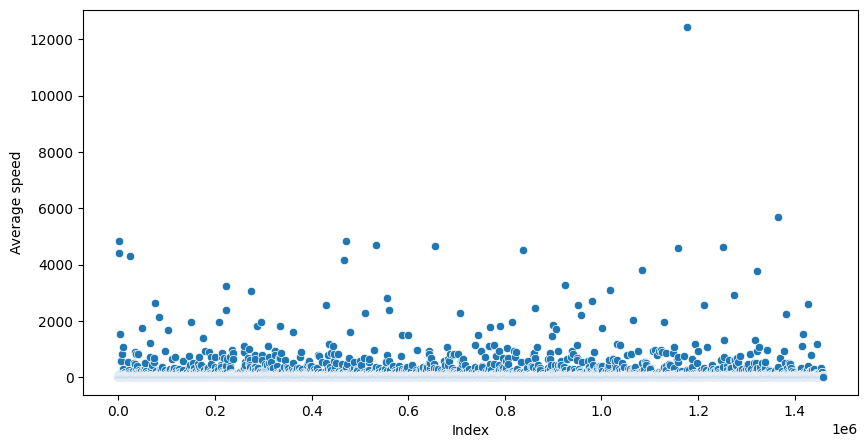

In [316]:
# Построение диаграммы рассеяния средней скорости движения автомобилей
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [317]:
# Удаление данных о поездках, длительность которых превышает 24 часа
outliers = taxi_data[taxi_data['trip_duration'] / 3600 > 24]
taxi_data = taxi_data[taxi_data['trip_duration'] / 3600 <= 24]

In [318]:
# Вывод количества выбросов по признаку длительности поездки
outliers_count = len(outliers)

print(f'Количество выбросов по признаку длительности поездки: {outliers_count}')

Количество выбросов по признаку длительности поездки: 4


In [319]:
# Удаление данных о поездках, средняя скорость которых превышает 300 км/ч
outliers_speed = taxi_data[(taxi_data['total_distance'] / 1000) / (taxi_data['trip_duration'] / 3600) > 300]
taxi_data = taxi_data[(taxi_data['total_distance'] / 1000) / (taxi_data['trip_duration'] / 3600) <= 300]

In [320]:
# Вывод количества выбросов по признаку средней скорости
outliers_speed_count = len(outliers_speed)

print(f'Количество выбросов по признаку скорости: {outliers_speed_count}')

Количество выбросов по признаку скорости: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [321]:
# Добавление признка длительности поездки в логарифмическом масштабе
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration'] + 1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

In [322]:
# Выдвижение нулевой и альтернативной гипотез для проверки данных на нормальность
H0 = 'Данные распределены нормально'
H1 = 'Распределение отлично от нормального'

# Уровень значимости
alpha = 0.05

# Проверка гипотезы с помощью теста Д’Агостино-Пирсона
_, p = stats.normaltest(taxi_data['trip_duration_log'])

# Вывод результатов теста
print(
  f'Статистика теста: | {round(_, 2)}',
  '---------------------------------',
  f'P-value:          | {round(p, 2)}',
  '---------------------------------',
  sep='\n'
)

if p > alpha / 2:
  print(H0)
else:
  print(H1)

Статистика теста: | 138350.17
---------------------------------
P-value:          | 0.0
---------------------------------
Распределение отлично от нормального


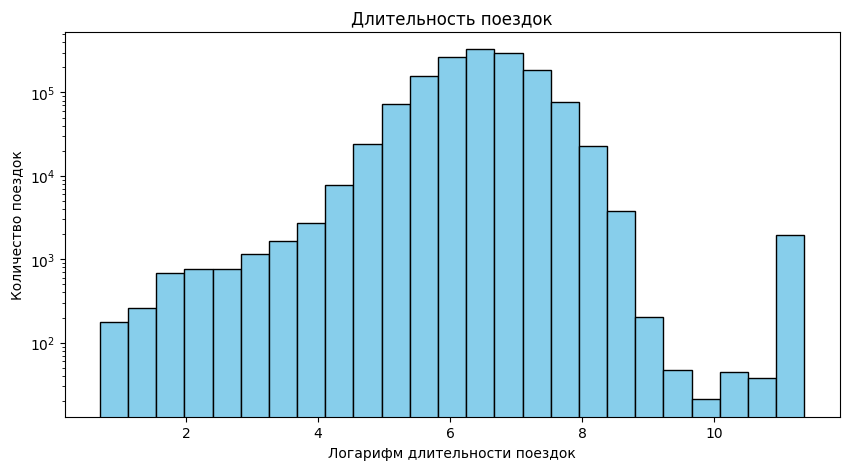

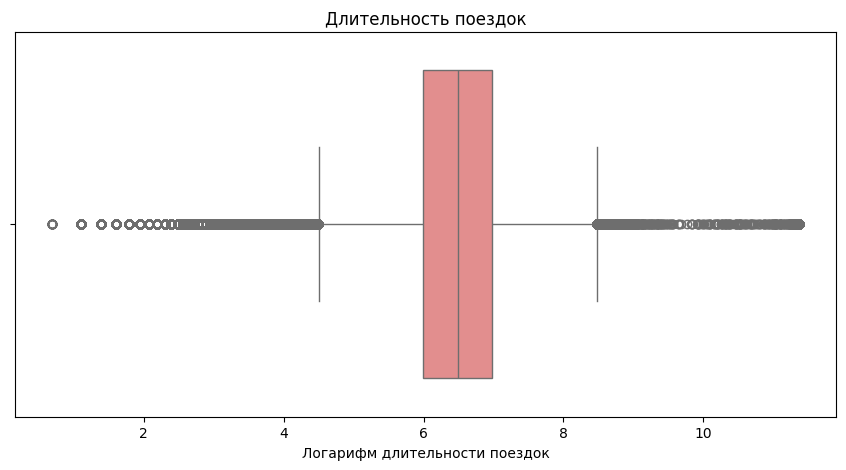

In [323]:
# Построение гистограммы распределения длительности поездки
plt.figure(figsize=(10, 5))
plt.hist(taxi_data['trip_duration_log'], bins=25, log=True, color='skyblue', edgecolor='black')
plt.title('Длительность поездок')
plt.xlabel('Логарифм длительности поездок')
plt.ylabel('Количество поездок')

# Построение коробчатой диаграммы распределения длительности поездки
plt.figure(figsize=(10.6, 5))
sns.boxplot(x=taxi_data['trip_duration_log'], color='lightcoral')
plt.title('Длительность поездок')
plt.xlabel('Логарифм длительности поездок')

plt.show()

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

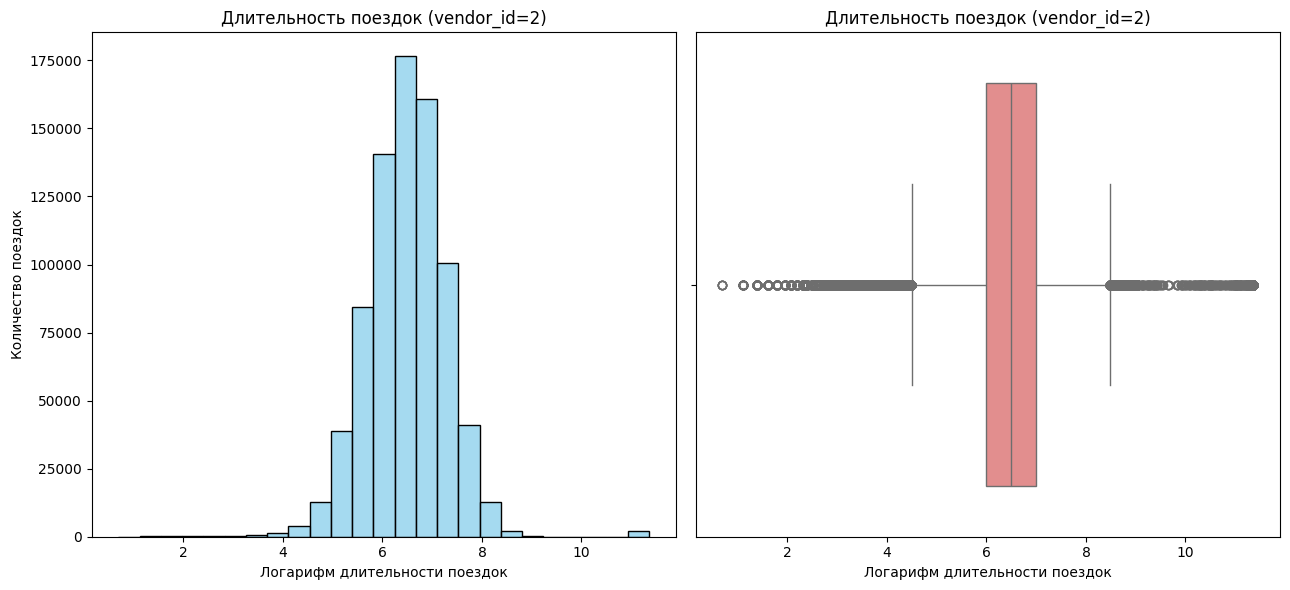

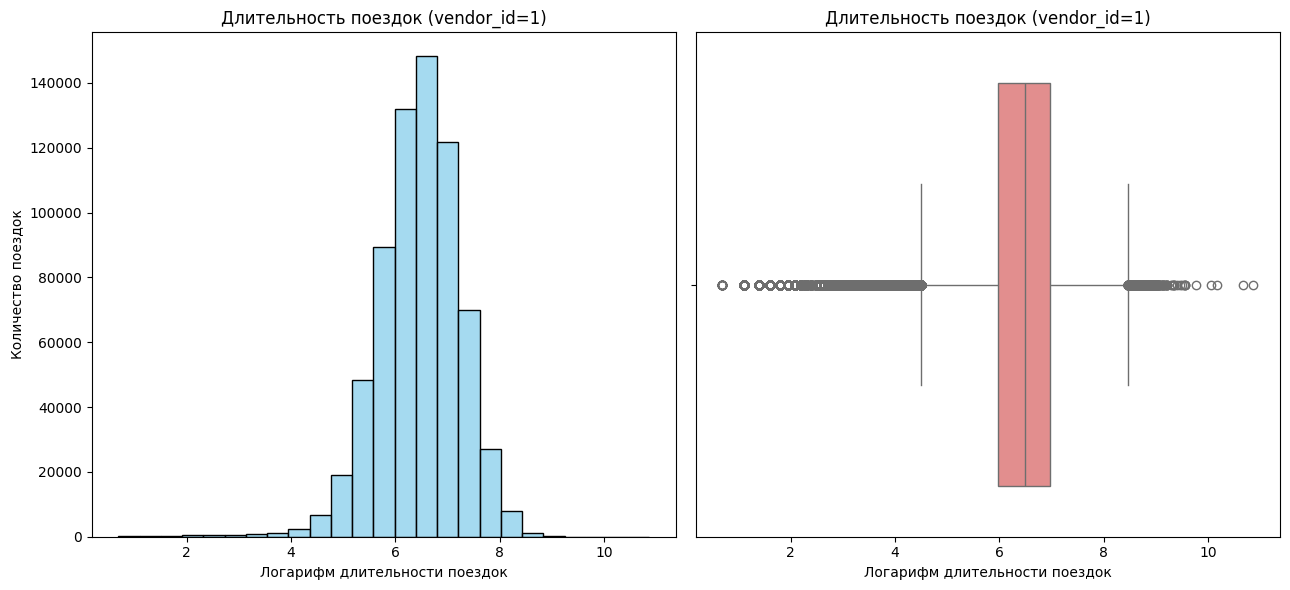

In [324]:
# Визуализация распределения длительности поездки в зависимости от таксопарка
for vendor_id in taxi_data['vendor_id'].unique():
  # Выбираем данные для текущего таксопарка
  data_subset = taxi_data[taxi_data['vendor_id'] == vendor_id]

  # Создаем два графика: гистограмму и коробчатую диаграмму
  plt.figure(figsize=(13, 6))

  # Построение гистограммы распределения длительности поездки в зависимости от таксопарка
  plt.subplot(1, 2, 1) 
  sns.histplot(data_subset['trip_duration_log'], bins=25, color='skyblue', edgecolor='black')
  plt.title(f'Длительность поездок (vendor_id={vendor_id})')
  plt.xlabel('Логарифм длительности поездок')
  plt.ylabel('Количество поездок')

  # Построение коробчатой диаграммы распределения длительности поездки в зависимости от таксопарка
  plt.subplot(1, 2, 2)
  sns.boxplot(x=data_subset['trip_duration_log'], color='lightcoral')
  plt.title(f'Длительность поездок (vendor_id={vendor_id})')
  plt.xlabel('Логарифм длительности поездок')

  plt.tight_layout()
  plt.show()

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

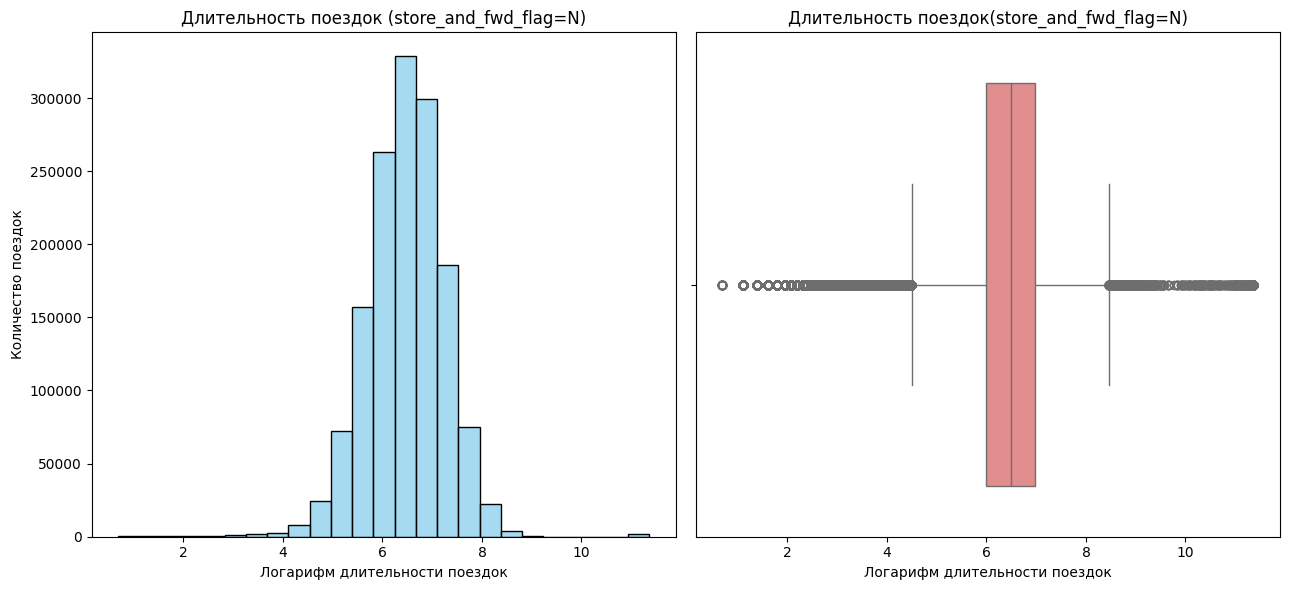

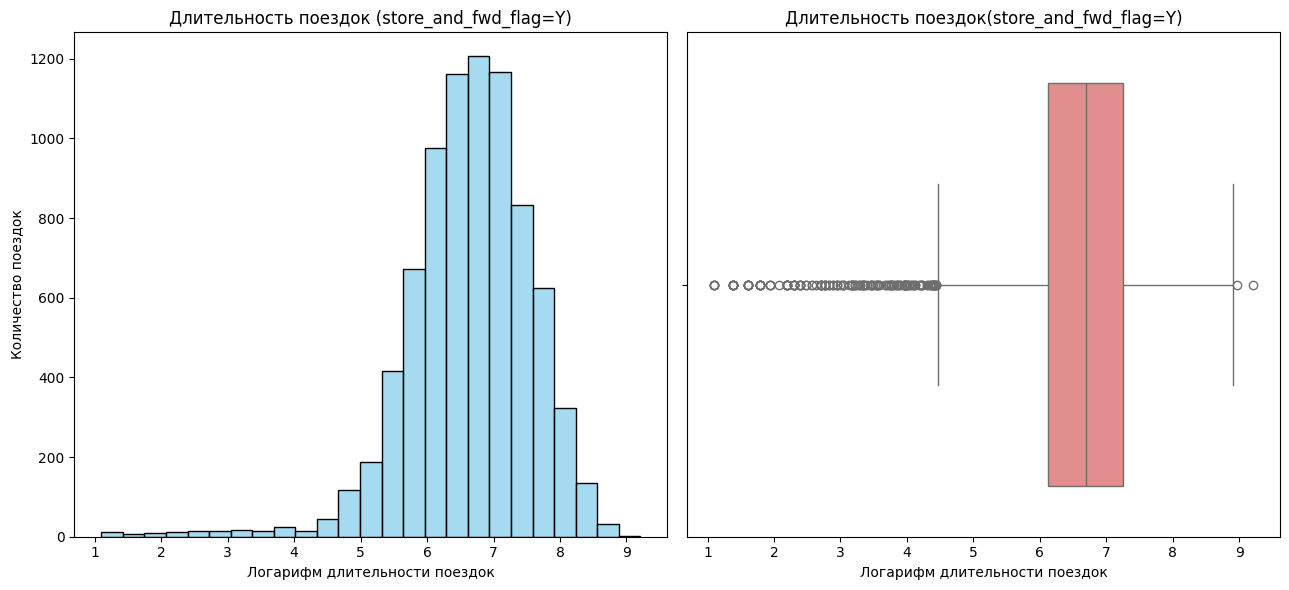

In [325]:
# Визуализация распределения длительности поездки в зависимости от признака отправки сообщения таксопарку
for fwd_flag in taxi_data['store_and_fwd_flag'].unique():
  # Выбираем данные для текущего таксопарка
  data_subset = taxi_data[taxi_data['store_and_fwd_flag'] == fwd_flag]

  # Создаем два графика: гистограмму и коробчатую диаграмму
  plt.figure(figsize=(13, 6))

  # Построение гистограммы распределения длительности поездки в зависимости от признака отправки сообщения таксопарку
  plt.subplot(1, 2, 1) 
  sns.histplot(data_subset['trip_duration_log'], bins=25, color='skyblue', edgecolor='black')
  plt.title(f'Длительность поездок (store_and_fwd_flag={fwd_flag})')
  plt.xlabel('Логарифм длительности поездок')
  plt.ylabel('Количество поездок')

  # Построение коробчатой диаграммы распределения длительности поездки в зависимости от признака отправки сообщения таксопарку
  plt.subplot(1, 2, 2)
  sns.boxplot(x=data_subset['trip_duration_log'], color='lightcoral')
  plt.title(f'Длительность поездок(store_and_fwd_flag={fwd_flag})')
  plt.xlabel('Логарифм длительности поездок')

  plt.tight_layout()
  plt.show()

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

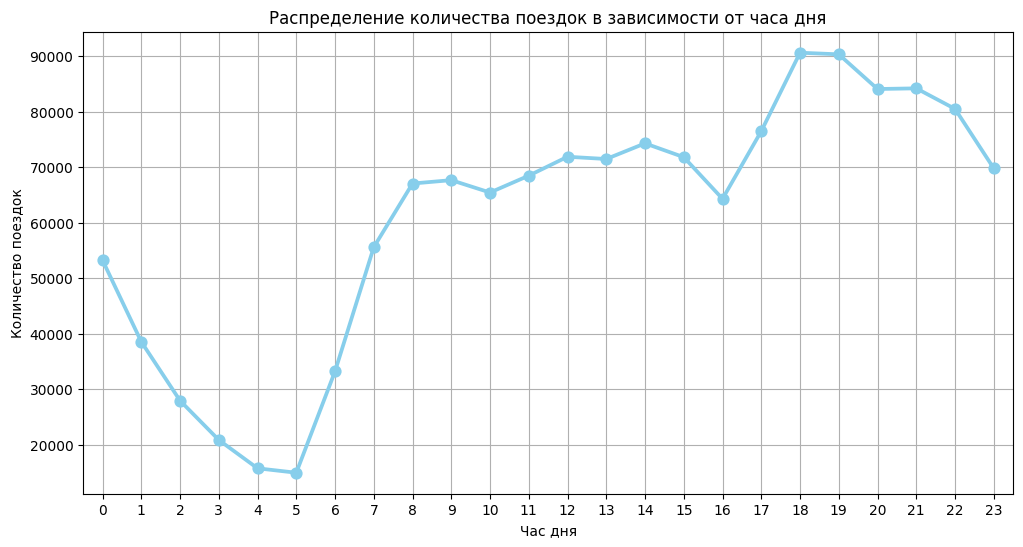

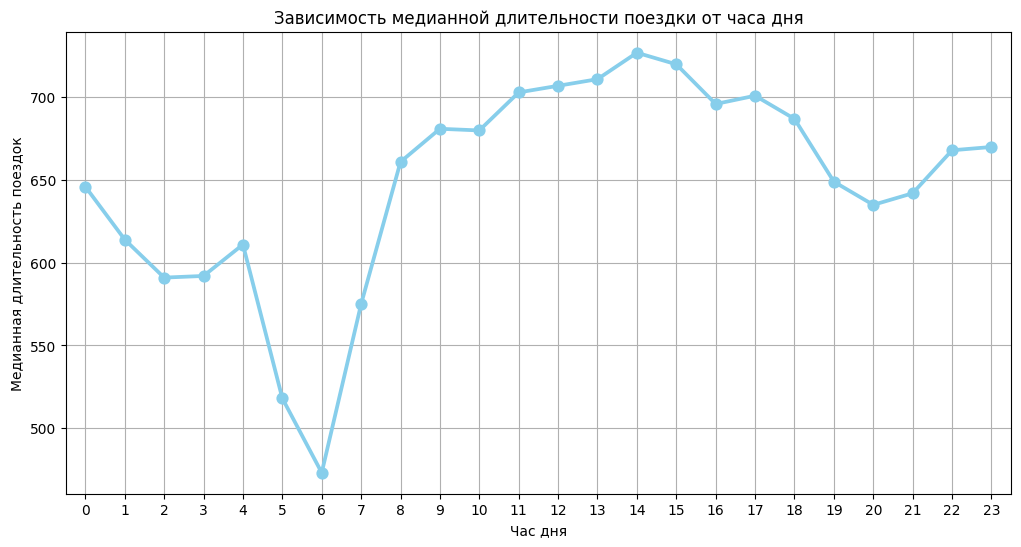

In [326]:
# Группировка данных по часу и подсчет количества поездок в каждом часе
hourly_trip_counts = taxi_data.groupby('pickup_hour').size().reset_index(name='trip_count')

# Построение линейного графика распределения количества поездок в зависимости от часа дня
plt.figure(figsize=(12, 6))
sns.pointplot(data=hourly_trip_counts, x='pickup_hour', y='trip_count', marker='o', color='skyblue')
plt.title('Распределение количества поездок в зависимости от часа дня')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.xticks(range(24))
plt.grid()

# Группировка данных по часу и вычисление медианной длительности поездки в каждом часе
hourly_median_duration = taxi_data.groupby('pickup_hour')['trip_duration'].median().reset_index()

# Построение линейного графика зависимость медианной длительности поездки от часа дня
plt.figure(figsize=(12.2, 6))
sns.pointplot(data=hourly_median_duration, x='pickup_hour', y='trip_duration', color='skyblue')
plt.title('Зависимость медианной длительности поездки от часа дня')
plt.xlabel('Час дня')
plt.ylabel('Медианная длительность поездок')
plt.xticks(range(24))
plt.grid()

plt.show()

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


In [327]:
taxi_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')

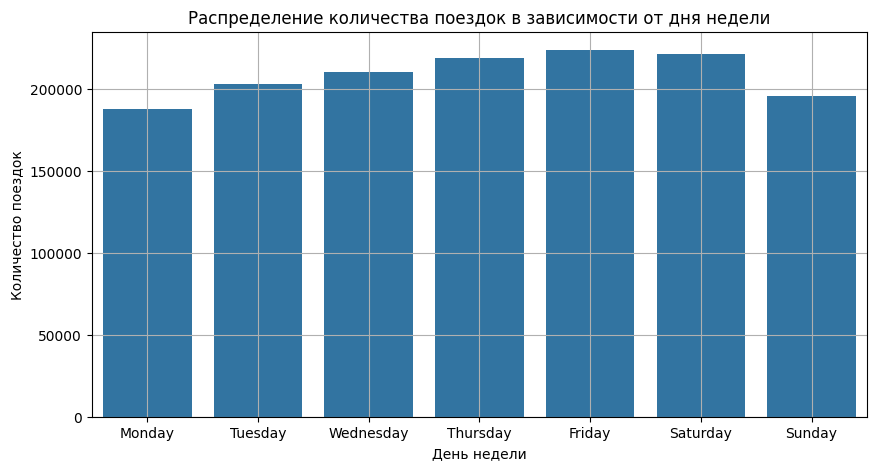

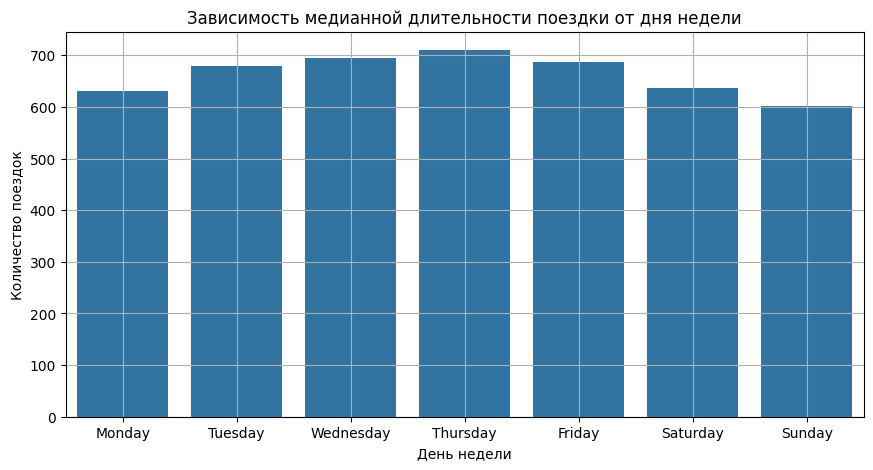

In [328]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
taxi_data['pickup_day_of_week'] = taxi_data['pickup_datetime'].dt.day_name()

# Построение столбчатой диаграммы распределения количества поездок в зависимости от часа дня
plt.figure(figsize=(10, 5))
sns.countplot(data=taxi_data, x='pickup_day_of_week', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
plt.title('Распределение количества поездок в зависимости от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.grid()

# Группирjdrf данные по дню недели и подсчет медианной длительности поездки в каждый день недели
daily_median_duration = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median().reset_index()

# Построение столбчатой диаграммы зависимость медианной длительности поездки от дня недели
plt.figure(figsize=(10.3, 5))
sns.barplot(data=daily_median_duration, y='trip_duration', x='pickup_day_of_week', order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']);
plt.title('Зависимость медианной длительности поездки от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.grid()

plt.show()

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

In [329]:
# Создание датафрейма со сводной таблицей
taxi_pivot = pd.pivot_table(
  data=taxi_data,
  values='trip_duration',
  index='pickup_hour',
  columns='pickup_day_of_week',
  aggfunc='median'
)

# Вывод сводной таблицы
taxi_pivot

pickup_day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
pickup_hour,,,,,,,
0,649.0,598.0,685.0,675.0,609.0,591.0,601.0
1,600.0,567.0,640.0,643.0,564.0,584.0,553.0
2,572.0,565.0,610.0,604.5,576.0,565.0,544.0
3,578.0,600.0,591.0,608.0,584.0,568.0,574.0
4,634.0,640.0,610.0,598.5,595.0,600.5,616.0
5,532.0,519.0,631.0,634.0,480.0,455.0,448.0
6,476.0,462.0,508.0,554.0,471.0,461.0,463.0
7,578.0,575.0,481.0,474.0,599.0,586.0,593.0
8,689.0,672.0,489.0,460.0,721.0,703.0,704.0


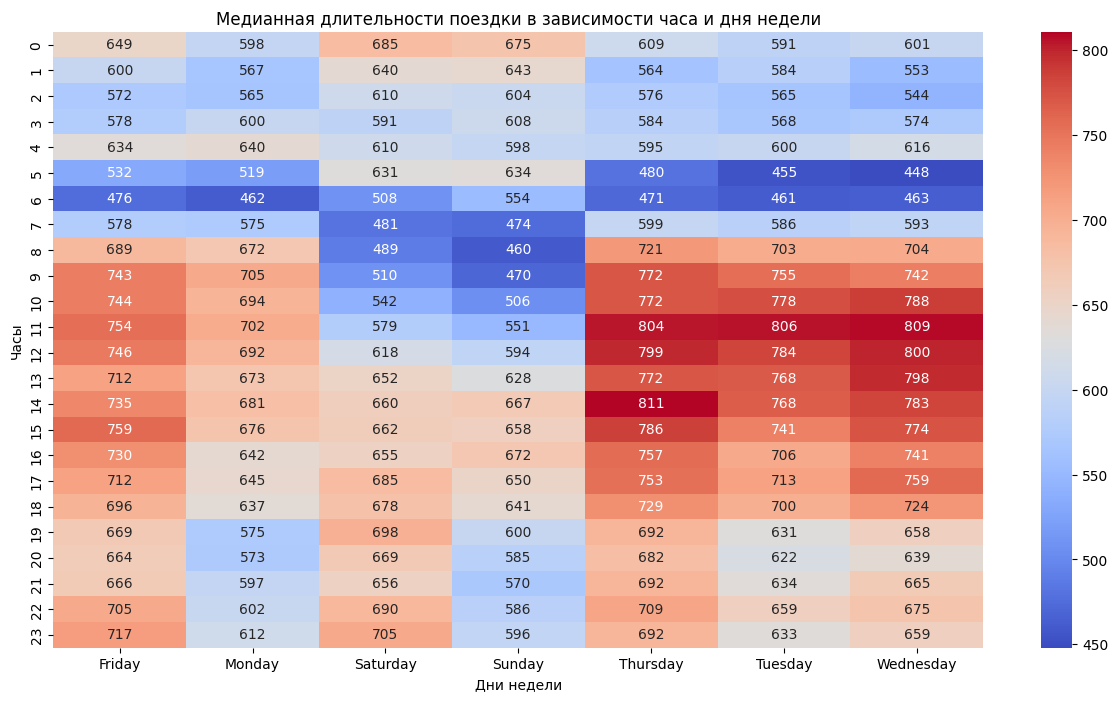

In [330]:
# Построение тепловой карты
plt.figure(figsize=(15, 8))
sns.heatmap(taxi_pivot, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Медианная длительности поездки в зависимости часа и дня недели')
plt.xlabel('Дни недели')
plt.ylabel('Часы')
plt.xticks()
plt.show()

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


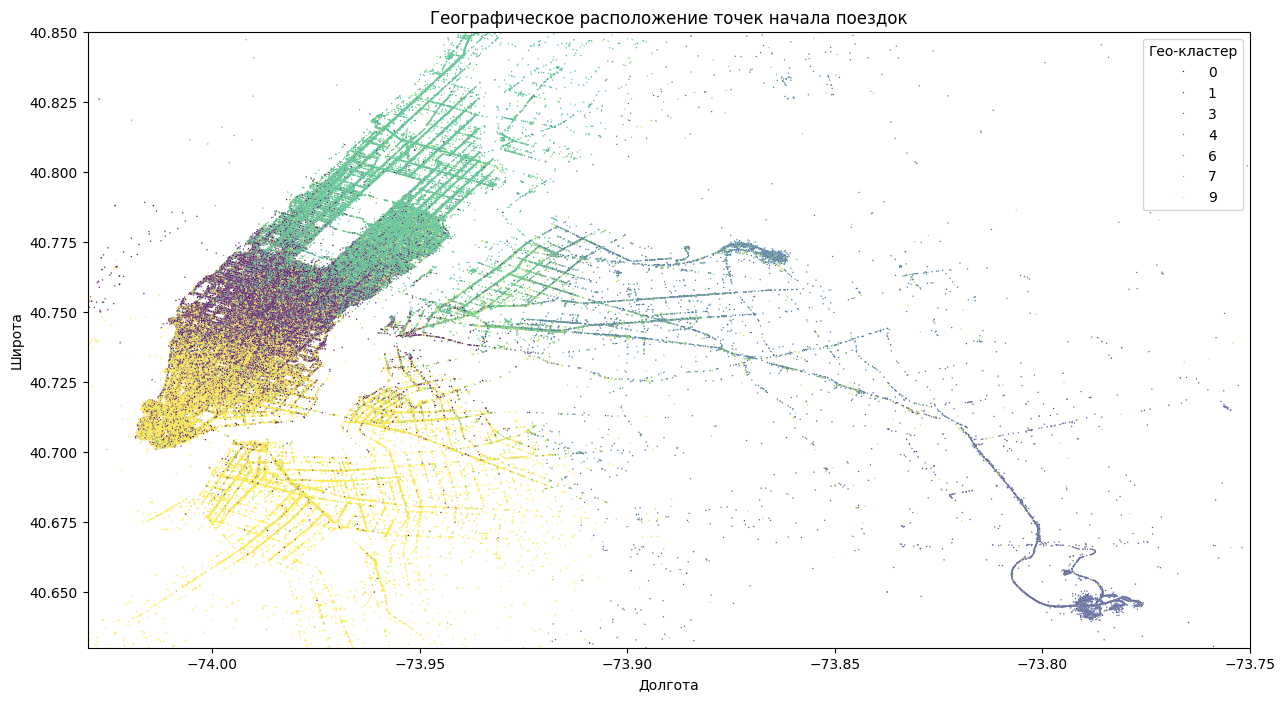

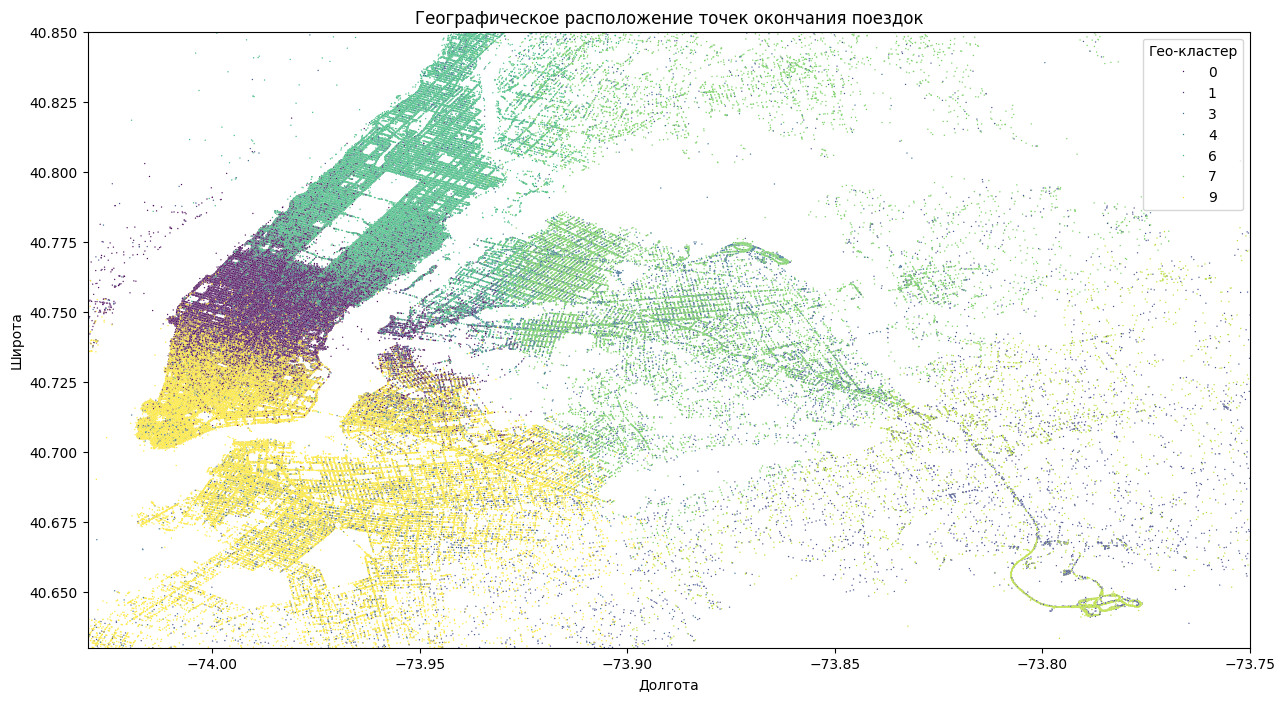

In [331]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

plt.figure(figsize=(15, 8))
sns.scatterplot(data=taxi_data, x='pickup_longitude', y='pickup_latitude', hue='geo_cluster', s=1, palette='viridis');
plt.title('Географическое расположение точек начала поездок')
plt.legend(title='Гео-кластер')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.xlabel('Долгота')
plt.ylabel('Широта')

plt.figure(figsize=(15, 8))
sns.scatterplot(data=taxi_data, x='dropoff_longitude', y='dropoff_latitude', hue='geo_cluster', s=1, palette='viridis');
plt.title('Географическое расположение точек окончания поездок')
plt.legend(title='Гео-кластер')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.xlabel('Долгота')
plt.ylabel('Широта')

plt.show()

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [332]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [333]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [334]:
# Удаление уникального признака 'id' и признака 'dropoff_datetime' (создающего утечку)
train_data = train_data.drop(['id', 'dropoff_datetime'], axis=1)

# Вывод количества столбцов в таблице после удаления
print(f"Количество столбцов после удаления: {len(train_data.columns)}")

Количество столбцов после удаления: 25


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [335]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [336]:
# Кодирование признака vendor_id
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)

# Кодирование признака store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

In [337]:
# Вывод среднего по закодированному столбцу vendor_id_encoded
mean_vendor_id_encoded = round(train_data['vendor_id'].mean(), 2)

print(f"Среднее по закодированному столбцу vendor_id: {mean_vendor_id_encoded}")

Среднее по закодированному столбцу vendor_id: 0.53


In [338]:
# Вывод среднего по закодированному столбцу vendor_id_encoded
mean_store_and_fwd_flag_encoded = round(train_data['store_and_fwd_flag'].mean(), 3)

print(f"Среднее по закодированному столбцу store_and_fwd_flag: {mean_store_and_fwd_flag_encoded}")

Среднее по закодированному столбцу store_and_fwd_flag: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [339]:
# Выбор признаков для кодирования
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# Создание экземпляра OneHotEncoder
one_hot_encoder =  preprocessing.OneHotEncoder(drop='first')

# Применение кодировщика к выбранным признакам
data_onehot_sparse = one_hot_encoder.fit_transform(train_data[columns_to_change]).toarray()

# Получение закодированных имен столбцов
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)

In [340]:
# Преобразуем результат в DataFrame
onehot_data = pd.DataFrame(data_onehot_sparse, columns=column_names)
onehot_data.head()

,pickup_day_of_week_Monday,pickup_day_of_week_Saturday,pickup_day_of_week_Sunday,pickup_day_of_week_Thursday,pickup_day_of_week_Tuesday,pickup_day_of_week_Wednesday,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [341]:
# Вывод количества столбцов в наборе данных закодированных признаков
print('Количество закодированных столбцов: {}'.format(onehot_data.shape[1]))

Количество закодированных столбцов: 18


Добавим полученную таблицу с закодированными признаками:

In [342]:
# Объединение набора данных о поездах с набром данных закодированных признаков
train_data = pd.concat([train_data.reset_index(drop=True).drop(columns_to_change, axis=1), onehot_data], axis=1)
train_data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_holiday,...,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,17,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,19,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,13,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [343]:
# Вывод количества столбцов в наборе данных о поездках
print('Количество столбцов в наборе данных: {}'.format(train_data.shape[1]))

Количество столбцов в наборе данных: 38


In [344]:
# Создание каталога для хранения обработанных данных
if not os.path.exists('data/prepared'):
  os.makedirs('data/prepared')

if not os.path.exists('data/prepared/trips.zip'):
  compression_opts = dict(method='zip', archive_name='trips.csv')  
  train_data.to_csv('data/prepared/trips.zip', index=False, compression=compression_opts)

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [345]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [346]:
# Разделение набора данных на обучающую и валидационную выборки
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(X, y_log, test_size=0.33, random_state=42)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [347]:
# Отбор признаков с помощью SelectKBest
selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=25)
selector.fit(X_train, y_train_log)

# Получение индексов выбранных признаков
best_features = selector.get_feature_names_out()

X_train = X_train[best_features]
X_valid = X_valid[best_features]

# Вывод отобранных признаков
print('Признаки, которые вошли в список отобранных:')
print('\n'.join(best_features))

Признаки, которые вошли в список отобранных:
vendor_id
passenger_count
pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
store_and_fwd_flag
pickup_hour
pickup_holiday
total_distance
total_travel_time
number_of_steps
haversine_distance
temperature
pickup_day_of_week_Monday
pickup_day_of_week_Saturday
pickup_day_of_week_Sunday
pickup_day_of_week_Thursday
pickup_day_of_week_Tuesday
pickup_day_of_week_Wednesday
geo_cluster_2
geo_cluster_3
geo_cluster_6
geo_cluster_7
geo_cluster_8


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [348]:
# Создание экземпляра MinMaxScaler
scaler = preprocessing.MinMaxScaler()

# Преобразовывание данных
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Вывод среднего арифметического для первого предиктора из валидационной выборки
print(f'Среднее арифметическое для первого предиктора из валидационной выборки: {round(np.mean(X_valid[:, 0]), 2)}')

Среднее арифметическое для первого предиктора из валидационной выборки: 0.54


In [349]:
# Создание датафреймов из массивов
X_train = pd.DataFrame(X_train, columns=best_features)
X_valid = pd.DataFrame(X_valid, columns=best_features)

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [363]:
# создаём объект класса LinearRegression
model_lr = linear_model.LinearRegression()

# обучаем модель и ищем параметры 
model_lr.fit(X_train, y_train_log)

# делаем предсказания
y_train_pred = model_lr .predict(X_train)
y_valid_pred = model_lr .predict(X_valid)

# рассчитываем RMSLE

print(
  f'RMSLE на тренировочной выборке: | {round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2)}',
  '--------------------------------------',
  f'RMSLE на валидационной выборке: | {round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2)}',
  sep='\n'
)

RMSLE на тренировочной выборке: | 0.54
--------------------------------------
RMSLE на валидационной выборке: | 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [364]:
# создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

# генерируем полиномиальные признаки
X_train_poly = poly.transform(X_train)
X_valid_poly = poly.transform(X_valid)

# строим модель полиномиальной регрессии
model_lr_poly = linear_model.LinearRegression()
model_lr_poly.fit(X_train_poly, y_train_log)

y_train_pred_poly = model_lr_poly.predict(X_train_poly)
y_valid_pred_poly = model_lr_poly.predict(X_valid_poly)

# рассчитываем RMSLE
print(
  f'RMSLE на тренировочной выборке: | {round()), 2)}',
  '--------------------------------------',
  f'RMSLE на валидационной выборке: | {round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_poly)), 2)}',
  sep='\n'
)

RMSLE на тренировочной выборке: | 0.47
--------------------------------------
RMSLE на валидационной выборке: | 0.69


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [369]:
# Строим модель полиномиальной регрессии с L2-регуляризацией
model_ridge = linear_model.Ridge(alpha=1)  # Установка коэффициента регуляризации alpha=1
model_ridge.fit(X_train_poly, y_train_log)

# Прогноз на тренировочной и валидационной выборках
y_train_pred_ridge = model_ridge.predict(X_train_poly)
y_valid_pred_ridge = model_ridge.predict(X_valid_poly)

# Вычисление метрики RMSLE на тренировочной и валидационной выборках
rmsle_train_poly = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_ridge))
rmsle_valid_poly = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_ridge))

# Вывод метрики RMSLE, округленной до сотых
print(
  f'RMSLE на тренировочной выборке (полиномиальная регрессия с L2-регуляризацией): | {round(rmsle_train_poly, 2)}',
  '-------------------------------------------------------------------------------------',
  f'RMSLE на валидационной выборке (полиномиальная регрессия с L2-регуляризацией): | {round(rmsle_valid_poly, 2)}',
  sep='\n'
)

RMSLE на тренировочной выборке (полиномиальная регрессия с L2-регуляризацией): | 0.48
-------------------------------------------------------------------------------------
RMSLE на валидационной выборке (полиномиальная регрессия с L2-регуляризацией): | 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [370]:
#Создаем объект класса дерево решений
model_dt = tree.DecisionTreeRegressor()

#Обучаем дерево по алгоритму CART
model_dt.fit(X_train, y_train_log)

#Выводим значения метрики 
y_train_pred_log = model_dt.predict(X_train)
y_valid_pred_log = model_dt.predict(X_valid)

# Вычисление метрики RMSLE на тренировочной и валидационной выборках
rmsle_train_dt = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_log))
rmsle_valid_dt = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_log))

# Вывод метрики RMSLE, округленной до сотых
print(f"RMSLE на тренировочной выборке: {round(rmsle_train_dt, 2)}")
print(f"RMSLE на валидационной выборке: {round(rmsle_valid_dt, 2)}")

RMSLE на тренировочной выборке: 0.0
RMSLE на валидационной выборке: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


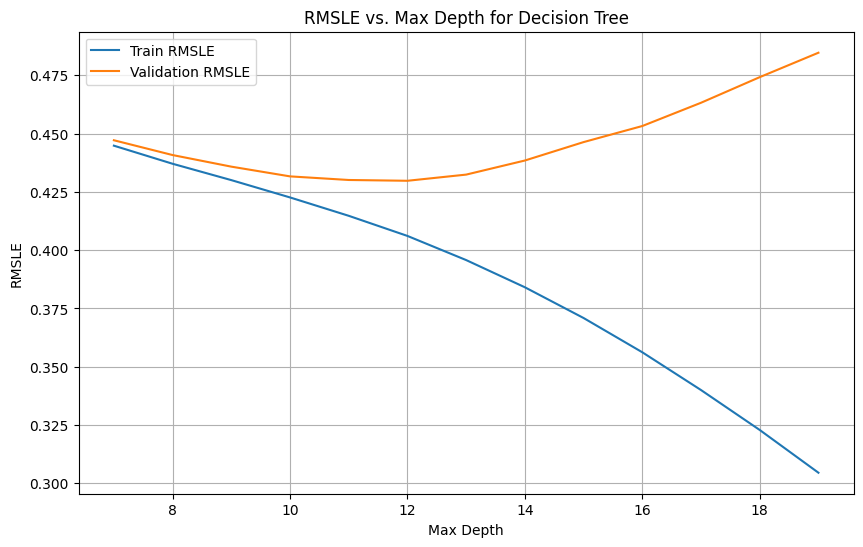

Оптимальная глубина дерева решений: 12
RMSLE  на тренировочной выборке: 0.41
RMSLE  на валидационной выборке: 0.43)


In [371]:
# Диапазон глубины дерева
max_depths = range(7, 20)

# Списки для хранения значений RMSLE
train_rmsle = []
valid_rmsle = []
# Перебор глубины дерева
for max_depth in max_depths:
    # Создание и обучение модели
    dt_new = tree.DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    #Обучаем дерево по алгоритму CART
    dt_new.fit(X_train, y_train_log)
    #Выводим значения метрики 
    y_train_pred = dt_new.predict(X_train)
    y_valid_pred = dt_new.predict(X_valid)
    
    train_rmsle.append(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)))
    valid_rmsle.append(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)))
    
# извлекаем индекс лучшего RMSLE на валидационной выборке
best_index = valid_rmsle.index(min(valid_rmsle))
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_rmsle, label='Train RMSLE')
plt.plot(max_depths, valid_rmsle, label='Validation RMSLE')
plt.xlabel('Max Depth')
plt.ylabel('RMSLE')
plt.legend()
plt.title('RMSLE vs. Max Depth for Decision Tree')
plt.grid(True)
plt.show()

print(f'Оптимальная глубина дерева решений: {max_depths[best_index]}')
print(f'RMSLE  на тренировочной выборке: {train_rmsle[best_index]:.2f}')
print(f'RMSLE  на валидационной выборке: {valid_rmsle[best_index]:.2f})')

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [355]:
# ваш код здесь

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [356]:
# ваш код здесь

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


In [357]:
# ваш код здесь

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [358]:
# ваш код здесь

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [359]:
test_data = pd.read_csv("data/raw/test.csv")
osrm_data_test = pd.read_csv("data/raw/osrm_data_test.csv")
test_id = test_data['id']

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/test.csv'

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/raw/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)